In [ ]:
train_path = '{path to file}'
val_path = '{path to file}'
test_path = '{path to file}'

In [ ]:
import pandas as pd
import os

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.DataFrame(columns=["Email", "Subject"])

for filename in os.listdir(train_path):
  with open(os.path.join(train_path,filename)) as f:
    content = f.read().split('@subject\n')
    df = pd.concat([df, pd.DataFrame.from_records([{"Email": content[0], "Subject": content[1]}])], ignore_index = True)

df

In [ ]:
import re

In [ ]:
df_val = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
delimiters = r'@subject\n|\n\n@ann0\n|\n\n@ann1\n|\n\n@ann2\n'
for filename in os.listdir(val_path):
  with open(os.path.join(val_path,filename)) as f:
    content_val = f.read()
    split_string = re.split(delimiters,content_val)
    df_val = pd.concat([df_val,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_val

In [ ]:
df_test = pd.DataFrame(columns=["Email", "Subject", "Ann0", "Ann1", "Ann2"])
for filename in os.listdir(test_path):
  with open(os.path.join(test_path,filename)) as f:
    content_test = f.read()
    split_string = re.split(delimiters,content_test)
    df_test = pd.concat([df_test,pd.DataFrame.from_records([{"Email": split_string[0], "Subject": split_string[1], "Ann0" : split_string[2], "Ann1" : split_string[3], "Ann2" : split_string[4]}])], ignore_index = True)

df_test

In [ ]:
df.to_csv(r'/content/drive/MyDrive/enron_subject_line/Task1Train.csv')
df_val.to_csv(r'/content/drive/MyDrive/enron_subject_line/Task1Val.csv')
df_test.to_csv(r'/content/drive/MyDrive/enron_subject_line/Task1Test.csv')

In [ ]:
import numpy as np

In [ ]:
narray = df.to_numpy()
length_checker = np.vectorize(len)

arr_len = length_checker(narray)

arr_len

In [ ]:
narray_val = df_val.to_numpy()
arr_len_val = length_checker(narray_val)

arr_len_val

In [ ]:
narray_test = df_test.to_numpy()
arr_len_test = length_checker(narray_test)

arr_len_test

histogram to show email length on x and email number on y

similarly, subject length on x and subject number on y

then mean and median of length for each

we can also show relation between length of email and length of subject

Use seaborn sns

https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
print(np.mean(arr_len, axis = 0))
print(np.mean(arr_len_val, axis = 0))
print(np.mean(arr_len_test, axis = 0))

[790.94444444  26.19278193]
[811.65306122  27.27908163  30.85153061  32.89234694  31.94540816]
[690.8683106   26.97219307  32.62329486  33.64742917  33.27701994]


In [ ]:
print(np.median(arr_len, axis = 0))
print(np.median(arr_len_val, axis = 0))
print(np.median(arr_len_test, axis = 0))

[425.  23.]
[443.  23.  28.  30.  29.]
[451.  24.  30.  32.  31.]


In [ ]:
df_length = pd.DataFrame(arr_len, columns = ["Email Length", "Subject Length"])
df_length

,Email Length,Subject Length
0,300,16
1,156,5
2,352,21
3,288,27
4,233,35
...,...,...
14431,252,38
14432,550,11
14433,197,23
14434,2764,27


In [ ]:
df_val_length = pd.DataFrame(arr_len_val, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_val_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,160,18,22,17,25
1,452,26,42,20,13
2,1204,3,18,46,30
3,260,33,14,43,18
4,445,24,32,14,34
...,...,...,...,...,...
1955,267,13,23,36,25
1956,556,52,18,28,32
1957,178,7,42,20,22
1958,760,38,31,27,50


In [ ]:
df_test_length = pd.DataFrame(arr_len_test, columns = ["Email Length", "Subject Length", "Ann0", "Ann1", "Ann2"])
df_test_length

,Email Length,Subject Length,Ann0,Ann1,Ann2
0,171,38,21,23,24
1,232,16,23,23,41
2,353,4,37,26,31
3,686,15,25,45,27
4,692,11,27,30,37
...,...,...,...,...,...
1901,204,27,23,46,28
1902,139,16,45,37,23
1903,381,13,39,24,37
1904,942,25,39,39,29


In [ ]:
df_length.max(axis=0)

Email Length      39003
Subject Length      117
dtype: int64

In [ ]:
df_length.min(axis=0)

Email Length      94
Subject Length     1
dtype: int64

[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Emails'),
 Text(0.5, 1.0, 'Email Length Histogram')]

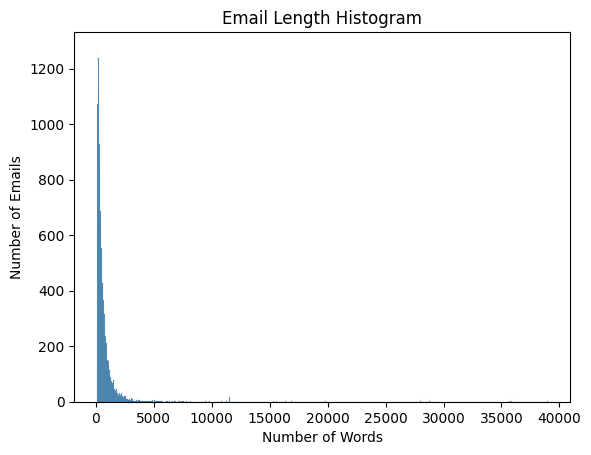

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(df_length['Email Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Emails", title = "Email Length Histogram")

[Text(0.5, 0, 'Number of Words'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Subject Length Histogram')]

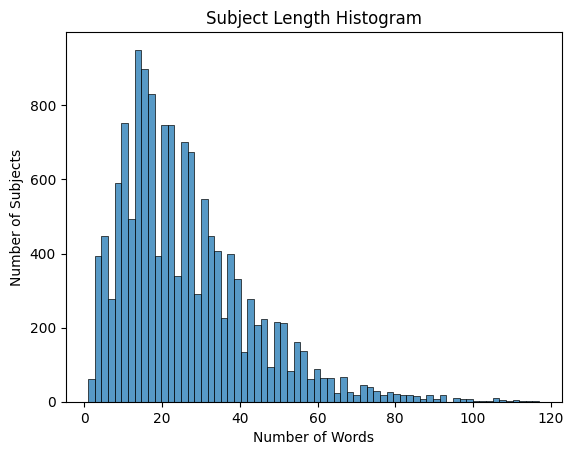

In [ ]:
ax = sns.histplot(df_length['Subject Length'])
ax.set(xlabel = "Number of Words", ylabel = "Number of Subjects", title = "Subject Length Histogram")

[Text(0.5, 1.0, 'Correlation between Email Length and Subject Length')]

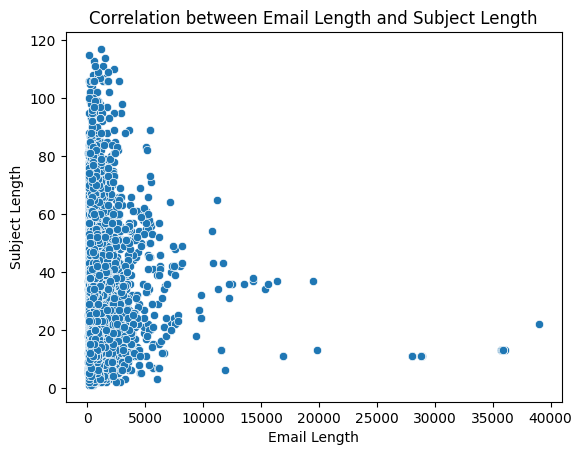

In [ ]:
ax = sns.scatterplot(data=df_length, x="Email Length", y="Subject Length")
ax.set(title = "Correlation between Email Length and Subject Length")

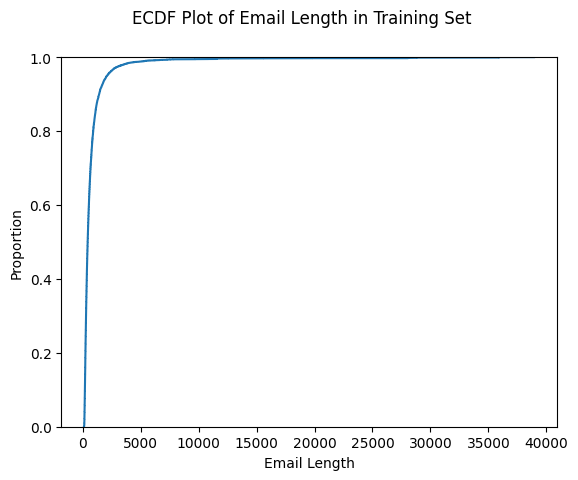

In [ ]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Email Length'])
plt.show()

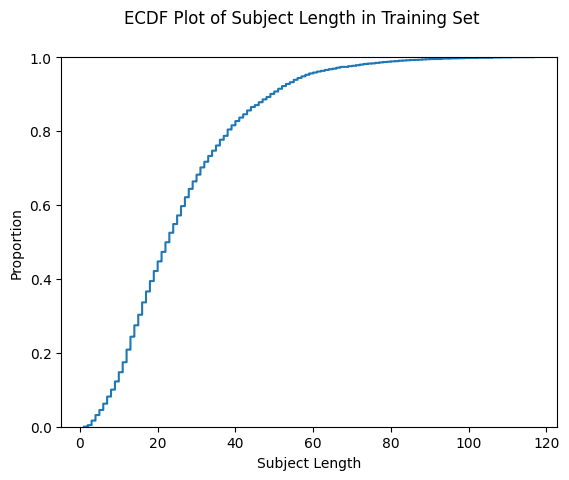

In [ ]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Training Set")
sns.ecdfplot(data=df_length, x=df_length['Subject Length'])
plt.show()

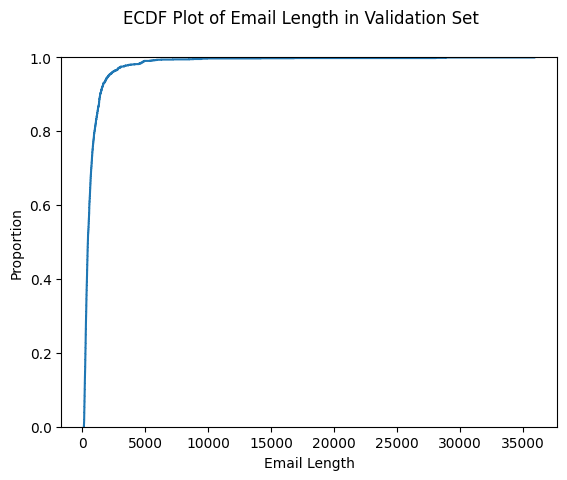

In [ ]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Email Length'])
plt.show()

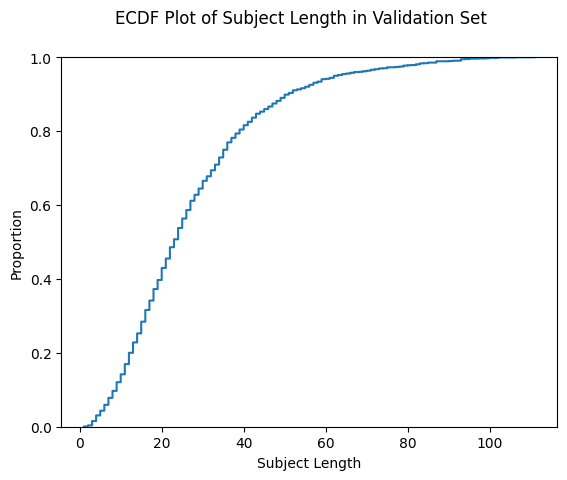

In [ ]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Validation Set")
sns.ecdfplot(data=df_val_length, x=df_val_length['Subject Length'])
plt.show()

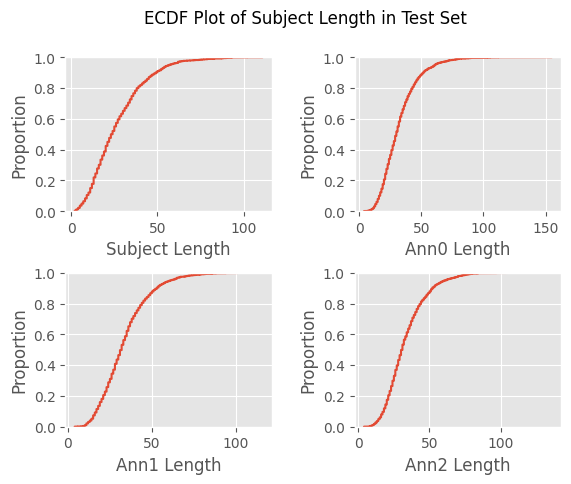

In [ ]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Subject Length in Test Set")
plt.style.use('ggplot')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.ecdfplot(data=df_test_length, x=df_test_length['Subject Length'])#,ax=ax)
ax.set(xlabel='Subject Length')
ax = fig.add_subplot(2, 2, 2)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann0'],ax=ax)
ax.set(xlabel='Ann0 Length')
ax = fig.add_subplot(2, 2, 3)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann1'],ax=ax)
ax.set(xlabel='Ann1 Length')
ax = fig.add_subplot(2, 2, 4)
sns.ecdfplot(data=df_test_length, x=df_test_length['Ann2'],ax=ax)
ax.set(xlabel='Ann2 Length')
plt.show()

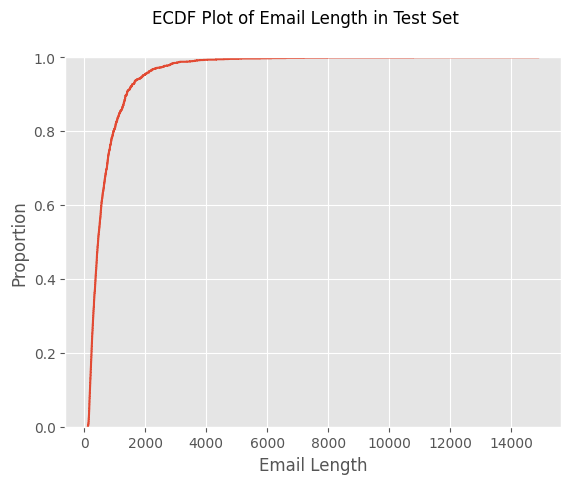

In [ ]:
fig = plt.figure()
plt.suptitle("ECDF Plot of Email Length in Test Set")
sns.ecdfplot(data=df_test_length, x=df_test_length['Email Length'])
plt.show()

In [ ]:
#import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/enron_subject_line/Task1Train.csv")
df_val = pd.read_csv("/content/drive/MyDrive/enron_subject_line/Task1Val.csv")
df_test = pd.read_csv("/content/drive/MyDrive/enron_subject_line/Task1Test.csv")

In [ ]:
df_test.head()

,Unnamed: 0,Email,Subject,Ann0,Ann1,Ann2
0,0,The following reports have been waiting for yo...,Expense Reports Awaiting Your Approval,report reviews needed,outstanding reports due,need approval of reports
1,1,Tom - (Not sure if this is the same number th...,Number Requested,re: 1099r form question,1099r form phone number,telephone number for 1099r form questions
2,2,Here's a starting point.\nI've tried to bracke...,MDEA,starting point of doc for your review,financial aspect confusion,here is the document for review
3,3,We are pleased to announce the creation of a n...,Asset Marketing,new asset marketing group,asset marketing creation and responsibilities,new group - asset marketing
4,4,Here's how it is shaping up: We have a fence ...,Odds N Ends,update on fence appointment,appointments for late november,personal planning for the coming week


In [ ]:
print(df.Subject.map(lambda x: len(x)).max())
print(df_val.Subject.map(lambda x: len(x)).max())
print(df_test.Subject.map(lambda x: len(x)).max())

117
111
111
